In [1]:
import os
from os import listdir
from os.path import isfile, join
import cv2
import dlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
! bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

In [2]:
# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [3]:
temp = pd.DataFrame()

In [4]:
#iterate over all images in folder /A01356

mypath = "A01356"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#print(onlyfiles)

for file in onlyfiles:
    # Load image
    #print(file)
    img = cv2.imread(mypath + "/" + file)
    img = cv2.resize(img, (512, 512))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = detector(gray)
    landmarks = predictor(gray, faces[0])
        
    feature = []
    for i in range(68):
        x = landmarks.part(i).x
        y = landmarks.part(i).y
        feature.append(x)
        feature.append(y)
        
    temp = pd.concat([temp, pd.DataFrame([feature])], ignore_index=True)

In [5]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,133,217,137,243,142,270,149,297,160,322,...,257,292,279,290,257,289,248,292,237,293
1,133,188,134,218,137,248,139,277,144,306,...,239,307,268,311,239,309,228,310,218,308
2,121,214,124,246,128,276,135,307,147,336,...,249,314,276,314,250,330,237,334,224,334
3,161,222,161,248,165,275,170,303,179,329,...,274,311,301,311,274,312,261,313,249,312
4,150,211,151,239,153,265,158,291,166,315,...,255,303,275,306,255,301,242,302,232,301


In [6]:
temp.shape

(19, 136)

In [9]:
def PCA(dataset):
    mean = np.mean(dataset, axis=0)
    z = dataset - mean
    cov_matrix = (1/len(dataset)) * (z.T).dot(z)
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)
    eig_pairs = [(eig_values[i], eig_vectors[:,i]) for i in range(len(eig_values))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    sorted_eigvalues = [eig_pairs[i][0] for i in range(len(eig_values))]
    sorted_eigvectors = np.array([eig_pairs[i][1] for i in range(len(eig_values))])

    cumulative_variance = np.cumsum(sorted_eigvalues) / np.sum(sorted_eigvalues)
    plt.plot(cumulative_variance)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance')
    plt.title('Cumulative Variance vs Number of Principal Components')
    plt.show()

    n_components = np.argmax(cumulative_variance > 0.99) + 1

    print('Number of Principal Components required:', n_components)

    W = sorted_eigvectors[:, :n_components]
    print('Shape of W:', W.shape)

    dataset_pca = z.dot(W)
    print('Shape of Reduced Dataset:', dataset_pca.shape)
    return W, dataset_pca

/home/jyolsnajisac/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


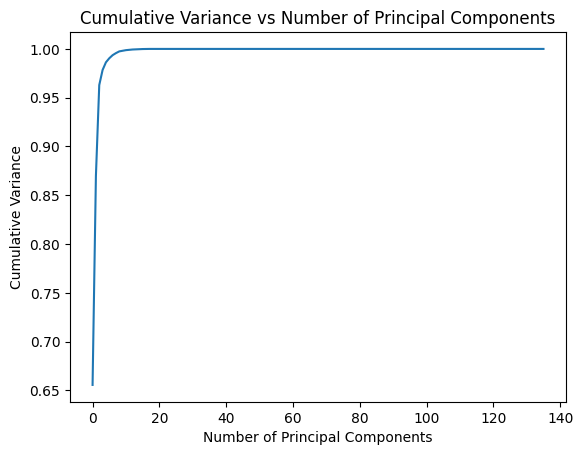

Number of Principal Components required: 6
Shape of W: (136, 6)
Shape of Reduced Dataset: (19, 6)


In [12]:
W, dataset_reduced = PCA(np.array(temp))

In [14]:
W.shape

(136, 6)

In [13]:
dataset_reduced.shape

(19, 6)